# Pathway analysis

In [35]:
import getpass
from transmart_api import TransmartApi

api = TransmartApi(
    host = 'http://localhost:8080',
    user = raw_input('Username:'),
    password = getpass.getpass('Password:'))

api.access()

Username:admin
Password:········


'SUCCESS'

In [36]:
import pandas

pandas.set_option('max_colwidth', 1000)
pandas.set_option("display.max_rows",100)

In [37]:
from pandas.io.json import json_normalize

obs = api.get_observations(study = 'GSE8581')

obs_df1 = json_normalize(obs)
obs_df2 = obs_df1.pivot(index = 'subject.inTrialId', columns = 'label', values = 'value')
obs_df3 = obs_df2.convert_objects()
obs_df4 = obs_df3.rename(
    columns = lambda c: c.replace('\Public Studies\GSE8581\\', '')[:-1],
    inplace = False)
obs_df4

label,Biomarker Data\GPL570,Endpoints\Diagnosis,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch),Subjects\Lung Disease,Subjects\Organism,Subjects\Race,Subjects\Sex
subject.inTrialId,,,,,,,,,,
GSE8581GSM210004,None,non-small cell squamous cell carcinoma,2.54,58.00,63,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210005,None,non-small cell adenocarcinoma,1.69,83.66,84,60,control,Homo sapiens,Afro American,female
GSE8581GSM210006,None,non-small cell adenocarcinoma,1.41,51.00,65,66,chronic obstructive pulmonary disease,Homo sapiens,Afro American,female
GSE8581GSM210007,E,non-small cell adenocarcinoma,2.51,80.96,46,66,not specified,Homo sapiens,Caucasian,male
GSE8581GSM210008,E,non-small cell adenocarcinoma,1.64,57.00,53,65,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,female
GSE8581GSM210009,E,non-small cell squamous cell carcinoma,2.72,74.00,53,64,control,Homo sapiens,Caucasian,female
GSE8581GSM210010,E,non-small cell adenocarcinoma,1.45,73.00,77,63,not specified,Homo sapiens,Caucasian,female
GSE8581GSM210011,E,non-small cell squamous cell carcinoma,1.87,56.00,56,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210012,E,non-small cell adenocarcinoma,2.76,70.58,61,69,not specified,Homo sapiens,Caucasian,male


In [38]:
control = obs_df4['Subjects\Lung Disease'] == 'control'
treatment = obs_df4['Subjects\Lung Disease'] == 'chronic obstructive pulmonary disease'

In [39]:
obs_df4[control].describe()

,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch)
count,19.000000,19.000000,19.000000,19.000000
mean,2.618421,77.448421,64.105263,65.842105
std,0.737219,4.540892,11.503114,4.193423
min,1.370000,71.000000,40.000000,58.000000
25%,2.080000,74.000000,55.000000,63.000000
50%,2.590000,76.000000,67.000000,65.000000
75%,2.970000,80.930000,71.000000,69.000000
max,4.040000,86.000000,84.000000,75.000000


In [40]:
obs_df4[treatment].describe()

,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch)
count,17.000000,17.000000,17.000000,17.000000
mean,1.265882,53.523529,65.058824,66.176471
std,0.594433,9.205130,8.554754,4.530939
min,0.400000,41.000000,52.000000,58.000000
25%,0.880000,45.000000,59.000000,63.000000
50%,1.290000,54.000000,64.000000,66.000000
75%,1.640000,58.000000,72.000000,71.000000
max,2.540000,78.000000,79.000000,73.000000


In [41]:
(hdHeader, hdRows) = api.get_hd_node_data(study = 'GSE8581',
                                          node_name = 'Lung',
                                          projection='zscore')

In [42]:
rows = [row.value[0].doubleValue._values for row in hdRows if row.bioMarker != 'null']
row_names = [row.bioMarker + "\\" + row.label for row in hdRows if row.bioMarker != 'null']
col_names = [assay.patientId for assay in hdHeader.assay]

In [43]:
from pandas import DataFrame

hd_df = DataFrame(rows, columns = col_names, index = row_names)
hd_df

,GSE8581GSM213034,GSE8581GSM212811,GSE8581GSM213036,GSE8581GSM212075,GSE8581GSM211008,GSE8581GSM210090,GSE8581GSM212855,GSE8581GSM212070,GSE8581GSM212810,GSE8581GSM210193,...,GSE8581GSM210979,GSE8581GSM213017,GSE8581GSM211007,GSE8581GSM210192,GSE8581GSM213020,GSE8581GSM210994,GSE8581GSM210010,GSE8581GSM210011,GSE8581GSM210007,GSE8581GSM213019
KIAA1377\235956_at,-2.374995e-01,7.941626e-01,0.222018,1.117909,6.363410e-01,-4.181891e-01,-1.823707e+00,1.354521,-2.500000,-2.198561e-02,...,1.234281e+00,-1.578853e-01,0.642150,-0.824503,-1.418721e-01,7.586432e-01,-1.102181e+00,-1.168079e+00,-6.064866e-01,2.864873e-01
ZNF358\226260_x_at,4.708822e-01,-2.500000e+00,0.551998,0.298824,-7.286189e-01,4.696274e-01,-2.807687e-01,0.299635,-2.500000,-3.315997e-01,...,3.100759e-01,1.628198e-01,0.695030,0.129990,1.036752e-01,-1.037046e+00,-3.647481e-01,3.708714e-01,-3.854062e-01,1.054395e+00
GPR135\214503_x_at,6.308876e-02,-1.971560e+00,0.429403,-0.606546,-7.913499e-17,-2.291924e-01,1.167696e+00,1.319348,-2.267266,9.553151e-01,...,5.955446e-01,6.090966e-01,1.238395,-0.078148,9.911758e-01,-7.427790e-01,-7.761581e-02,4.237702e-01,-2.863704e-01,-7.628633e-01
GPATCH2\242224_at,1.101496e-01,-3.358226e-01,-0.656001,-0.014406,-2.024513e-01,-1.037138e-02,-1.055835e+00,0.522693,-2.500000,4.395237e-01,...,3.377338e-01,-1.245019e+00,0.809489,0.112782,1.517590e-01,5.940620e-01,-1.477183e-01,-1.779910e-01,1.171425e-01,1.539858e-01
RPL24\214143_x_at,1.868383e-01,1.476438e-02,0.003760,-0.026180,5.286380e-02,-2.765255e-15,1.267947e-01,0.125205,-2.500000,-8.126549e-02,...,5.964594e-02,-5.714644e-02,0.044090,-0.187937,1.330189e-01,1.035764e-01,-1.438904e-01,-2.244213e-01,-3.951937e-01,3.198973e-01
PALM2\1554640_at,-1.460607e-01,-2.671897e-01,-0.625874,0.321917,-2.148522e+00,-1.406787e+00,1.648780e+00,1.031431,-2.370058,-1.142304e-01,...,7.204935e-01,6.870224e-01,1.292842,-0.257120,5.744479e-01,3.985112e-01,4.682653e-02,2.494825e-01,1.336069e-01,9.463886e-01
LOC339316\242084_at,-8.695599e-02,-1.501149e-01,2.208113,-0.725581,1.596191e+00,5.343815e-02,1.648072e-01,0.454762,1.022814,-8.821926e-01,...,1.952618e-01,-6.714563e-01,2.500000,-0.980878,0.000000e+00,4.029939e-01,-8.271509e-01,-6.114075e-01,2.050778e+00,2.693141e-01
FECH\203115_at,3.809356e-01,1.352984e-01,-0.442387,-0.219601,3.856423e-01,1.784519e-01,-1.081562e+00,0.720528,-2.500000,2.179938e-01,...,1.106194e+00,-1.906898e-01,0.315945,-0.107265,-4.421974e-01,2.162255e-01,-9.024499e-02,-4.498444e-01,2.732963e-01,6.115749e-01
KCNJ9\207527_at,2.446787e-01,-7.501915e-01,0.221697,0.497712,-2.342015e-02,8.869240e-01,-5.943556e-01,0.204983,-2.500000,1.110048e+00,...,7.171176e-01,9.340802e-02,0.381381,-0.367554,-1.282485e-15,5.520371e-01,3.760669e-01,-1.293106e+00,-1.034804e+00,6.951946e-01
C21orf96\220918_at,6.877719e-01,4.009709e-01,0.859799,1.189436,-1.291472e+00,-4.096633e-01,-4.467567e-01,0.340609,-2.500000,6.170242e-01,...,1.322267e-01,-2.444516e+00,0.736984,-0.937333,1.411358e-01,-8.504788e-01,1.726166e-02,-4.542636e-01,-8.424365e-01,1.258965e+00


In [44]:
design_df = DataFrame({'control': control[col_names], 'treatment': treatment[col_names]})
design_df

,control,treatment
subject.inTrialId,,
GSE8581GSM213034,False,False
GSE8581GSM212811,True,False
GSE8581GSM213036,True,False
GSE8581GSM212075,False,True
GSE8581GSM211008,True,False
GSE8581GSM210090,False,False
GSE8581GSM212855,False,False
GSE8581GSM212070,True,False
GSE8581GSM212810,False,True


In [45]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


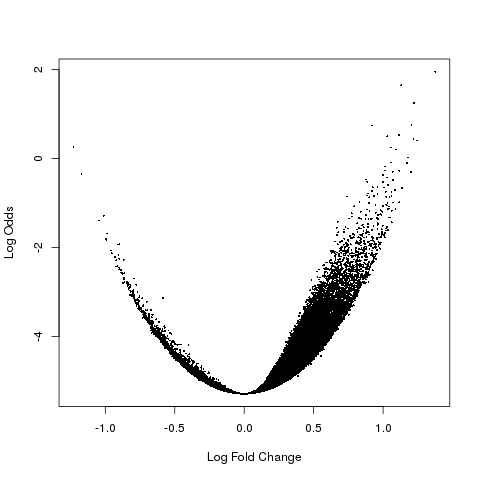

In [46]:
%%R -i hd_df -i design_df -o top_fit

library(limma)

design.matrix <- sapply(design_df, as.numeric)
contrast.matrix <- makeContrasts(control - treatment, levels = design.matrix)

fit <- lmFit(hd_df, design.matrix)
fit <- contrasts.fit(fit, contrast.matrix)
fit <- eBayes(fit)

contr=1
top_fit = data.frame(
    probe = rownames(fit$coefficients),
    log_fc = fit$coefficients[, contr],
    t = fit$t[, contr],
    p_value = fit$p.value[, contr],
    b = fit$lods[, contr],
    stringsAsFactors = FALSE
)

volcanoplot(fit)

In [47]:
top_probes = top_fit[top_fit.p_value < 0.001] \
.set_index(['probe']).sort(['p_value'], ascending = True)
top_probes

,log_fc,t,p_value,b
probe,,,,
DNM3\1558502_s_at,1.375778,4.806308,0.000009,1.945957
CASC4\1552719_at,1.130824,4.687018,0.000014,1.650206
ZNF30\232014_at,1.224315,4.522312,0.000026,1.246204
LOC389634\1560119_at,1.204393,4.320760,0.000053,0.759543
RP9\227852_at,0.921346,4.312707,0.000055,0.740289
SLITRK6\232481_s_at,1.113788,4.223494,0.000075,0.528059
AGTPBP1\204499_at,1.030825,4.211223,0.000078,0.499022
LOC389906\1558045_a_at,1.219038,4.182897,0.000086,0.432140
GFRA2\205722_s_at,1.246157,4.171039,0.000090,0.404202


In [48]:
def get_gene_name(probe):
    return probe.split('\\')[0]

top_probes['gene_name'] = top_probes.index.map(get_gene_name)
top_probes

,log_fc,t,p_value,b,gene_name
probe,,,,,
DNM3\1558502_s_at,1.375778,4.806308,0.000009,1.945957,DNM3
CASC4\1552719_at,1.130824,4.687018,0.000014,1.650206,CASC4
ZNF30\232014_at,1.224315,4.522312,0.000026,1.246204,ZNF30
LOC389634\1560119_at,1.204393,4.320760,0.000053,0.759543,LOC389634
RP9\227852_at,0.921346,4.312707,0.000055,0.740289,RP9
SLITRK6\232481_s_at,1.113788,4.223494,0.000075,0.528059,SLITRK6
AGTPBP1\204499_at,1.030825,4.211223,0.000078,0.499022,AGTPBP1
LOC389906\1558045_a_at,1.219038,4.182897,0.000086,0.432140,LOC389906
GFRA2\205722_s_at,1.246157,4.171039,0.000090,0.404202,GFRA2


In [49]:
from utils import Entrez

entrez = Entrez()

top_probes['gene_id'] = top_probes.gene_name.map(entrez.get_gene_id)
top_probes

,log_fc,t,p_value,b,gene_name,gene_id
probe,,,,,,
DNM3\1558502_s_at,1.375778,4.806308,0.000009,1.945957,DNM3,26052
CASC4\1552719_at,1.130824,4.687018,0.000014,1.650206,CASC4,113201
ZNF30\232014_at,1.224315,4.522312,0.000026,1.246204,ZNF30,90075
LOC389634\1560119_at,1.204393,4.320760,0.000053,0.759543,LOC389634,389634
RP9\227852_at,0.921346,4.312707,0.000055,0.740289,RP9,6100
SLITRK6\232481_s_at,1.113788,4.223494,0.000075,0.528059,SLITRK6,84189
AGTPBP1\204499_at,1.030825,4.211223,0.000078,0.499022,AGTPBP1,23287
LOC389906\1558045_a_at,1.219038,4.182897,0.000086,0.432140,LOC389906,389906
GFRA2\205722_s_at,1.246157,4.171039,0.000090,0.404202,GFRA2,2675


In [50]:
from utils import Kegg

kegg = Kegg(gene_ids = top_probes.gene_id)

top_probes['pathways_ids'] = top_probes.gene_id.map(kegg.get_pathways_image_links_by_gene)

from IPython.display import HTML
HTML(top_probes.to_html(escape=False))

,log_fc,t,p_value,b,gene_name,gene_id,pathways_ids
probe,,,,,,,
DNM3\1558502_s_at,1.375778,4.806308,0.000009,1.945957,DNM3,26052,"[hsa04144, hsa04721, hsa04961, hsa05100]"
CASC4\1552719_at,1.130824,4.687018,0.000014,1.650206,CASC4,113201,[]
ZNF30\232014_at,1.224315,4.522312,0.000026,1.246204,ZNF30,90075,[]
LOC389634\1560119_at,1.204393,4.320760,0.000053,0.759543,LOC389634,389634,[]
RP9\227852_at,0.921346,4.312707,0.000055,0.740289,RP9,6100,[]
SLITRK6\232481_s_at,1.113788,4.223494,0.000075,0.528059,SLITRK6,84189,[]
AGTPBP1\204499_at,1.030825,4.211223,0.000078,0.499022,AGTPBP1,23287,[]
LOC389906\1558045_a_at,1.219038,4.182897,0.000086,0.432140,LOC389906,389906,[]
GFRA2\205722_s_at,1.246157,4.171039,0.000090,0.404202,GFRA2,2675,[]


In [51]:
pathways_df = DataFrame(kegg.get_all_pathways_rows(), columns=['link', 'genes'])

pathways_df = pathways_df[pathways_df.genes > 1].sort(['genes'], ascending = False)

HTML(pathways_df.to_html(escape=False))

,link,genes
5,hsa04723,2
32,hsa05200,2
33,hsa05202,2
